In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

In [2]:
con=sqlite3.connect("sakila_master.db")
cur=con.cursor()

In [3]:
all_tables=pd.read_sql('''select * from sqlite_master where type='table' ''',con)
all_tables

,type,name,tbl_name,rootpage,sql
0,table,actor,actor,2,CREATE TABLE actor (\n actor_id numeric NOT N...
1,table,country,country,5,CREATE TABLE country (\n country_id SMALLINT ...
2,table,city,city,9,"CREATE TABLE city (\n city_id int NOT NULL,\n..."
3,table,address,address,13,CREATE TABLE address (\n address_id int NOT N...
4,table,language,language,17,CREATE TABLE language (\n language_id SMALLIN...
5,table,category,category,19,CREATE TABLE category (\n category_id SMALLIN...
6,table,customer,customer,22,CREATE TABLE customer (\n customer_id INT NOT...
7,table,film,film,29,"CREATE TABLE film (\n film_id int NOT NULL,\n..."
8,table,film_actor,film_actor,35,CREATE TABLE film_actor (\n actor_id INT NOT ...
9,table,film_category,film_category,40,CREATE TABLE film_category (\n film_id INT NO...


In [4]:
film_check=pd.read_sql('''select f.title,f.rental_duration,f.rental_rate,f.replacement_cost,f.rating,c.name from film f
                        join film_category fc on f.film_id=fc.film_id
                        join category c on fc.category_id=c.category_id
 ''',con)
film_check

,title,rental_duration,rental_rate,replacement_cost,rating,name
0,ACADEMY DINOSAUR,6,0.99,20.99,PG,Documentary
1,ACE GOLDFINGER,3,4.99,12.99,G,Horror
2,ADAPTATION HOLES,7,2.99,18.99,NC-17,Documentary
3,AFFAIR PREJUDICE,5,2.99,26.99,G,Horror
4,AFRICAN EGG,6,2.99,22.99,G,Family
...,...,...,...,...,...,...
995,YOUNG LANGUAGE,6,0.99,9.99,G,Documentary
996,YOUTH KICK,4,0.99,14.99,NC-17,Music
997,ZHIVAGO CORE,6,0.99,10.99,NC-17,Horror
998,ZOOLANDER FICTION,5,2.99,28.99,R,Children


In [5]:
rental_check=pd.read_sql('''select c.first_name||' '||c.last_name as full_name,strftime('%Y-%m-%d',r.rental_date) as rental_date,
                         strftime('%Y-%m-%d',r.return_date) as return_date,f.rental_rate,f.replacement_cost,p.amount,f.rental_duration,
                         f.rating from customer c
                         join payment p on c.customer_id=p.customer_id
                         join rental r on p.rental_id=r.rental_id 
                         join inventory i on r.inventory_id=i.inventory_id
                         join film f on i.film_id=f.film_id
                         group by 1''',con)
rental_check

,full_name,rental_date,return_date,rental_rate,replacement_cost,amount,rental_duration,rating
0,AARON SELBY,2005-05-26,2005-06-04,4.99,26.99,8.99,5,NC-17
1,ADAM GOOCH,2005-05-30,2005-06-01,0.99,29.99,0.99,4,PG
2,ADRIAN CLARY,2005-05-27,2005-06-05,2.99,25.99,5.99,6,PG-13
3,AGNES BISHOP,2005-05-29,2005-05-30,2.99,10.99,2.99,7,PG-13
4,ALAN KAHN,2005-05-31,2005-06-01,4.99,23.99,4.99,5,PG-13
...,...,...,...,...,...,...,...,...
594,WILLIE MARKHAM,2005-05-26,2005-06-04,4.99,15.99,8.99,5,G
595,WILMA RICHARDS,2005-06-15,2005-06-19,0.99,10.99,0.99,5,PG-13
596,YOLANDA WEAVER,2005-05-27,2005-06-05,0.99,29.99,4.99,5,G
597,YVONNE WATKINS,2005-05-25,2005-06-02,0.99,21.99,5.99,3,PG


In [6]:
rental_check.info()
rental_check.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   full_name         599 non-null    object 
 1   rental_date       599 non-null    object 
 2   return_date       599 non-null    object 
 3   rental_rate       599 non-null    float64
 4   replacement_cost  599 non-null    float64
 5   amount            599 non-null    float64
 6   rental_duration   599 non-null    int64  
 7   rating            599 non-null    object 
dtypes: float64(3), int64(1), object(4)
memory usage: 37.6+ KB


,rental_rate,replacement_cost,amount,rental_duration
count,599.000000,599.000000,599.000000,599.000000
mean,3.010033,20.380651,4.186995,4.951586
std,1.679982,6.091634,2.320029,1.348600
min,0.990000,9.990000,0.990000,3.000000
25%,0.990000,14.990000,2.990000,4.000000
50%,2.990000,20.990000,3.990000,5.000000
75%,4.990000,25.990000,4.990000,6.000000
max,4.990000,29.990000,11.990000,7.000000


<Axes: ylabel='Density'>

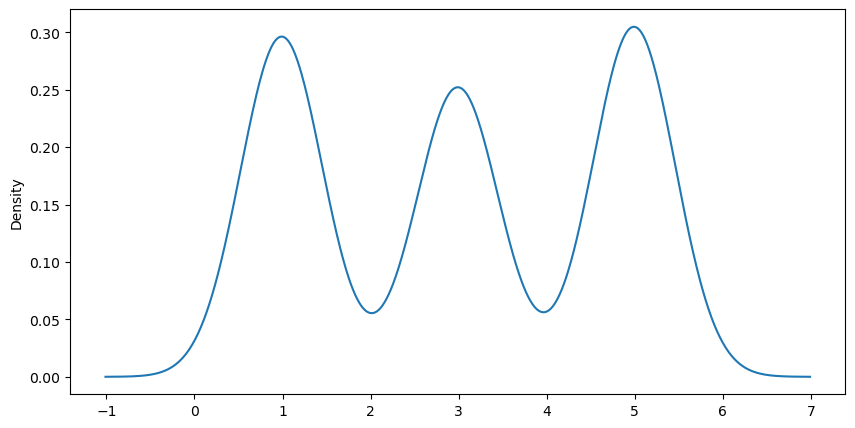

In [7]:
rental_check['rental_rate'].plot(kind='density',figsize=(10,5))

In [8]:
rental_check['gain']=round(rental_check['rental_rate']/rental_check['replacement_cost']*100,2)
rental_check

,full_name,rental_date,return_date,rental_rate,replacement_cost,amount,rental_duration,rating,gain
0,AARON SELBY,2005-05-26,2005-06-04,4.99,26.99,8.99,5,NC-17,18.49
1,ADAM GOOCH,2005-05-30,2005-06-01,0.99,29.99,0.99,4,PG,3.30
2,ADRIAN CLARY,2005-05-27,2005-06-05,2.99,25.99,5.99,6,PG-13,11.50
3,AGNES BISHOP,2005-05-29,2005-05-30,2.99,10.99,2.99,7,PG-13,27.21
4,ALAN KAHN,2005-05-31,2005-06-01,4.99,23.99,4.99,5,PG-13,20.80
...,...,...,...,...,...,...,...,...,...
594,WILLIE MARKHAM,2005-05-26,2005-06-04,4.99,15.99,8.99,5,G,31.21
595,WILMA RICHARDS,2005-06-15,2005-06-19,0.99,10.99,0.99,5,PG-13,9.01
596,YOLANDA WEAVER,2005-05-27,2005-06-05,0.99,29.99,4.99,5,G,3.30
597,YVONNE WATKINS,2005-05-25,2005-06-02,0.99,21.99,5.99,3,PG,4.50


In [9]:
rental_check['gain'].round(2).mean()
rental_check['gain'].round(2).median()

13.6

In [10]:
rental_check.loc[(rental_check['rental_rate']>2.99) & (rental_check['rating']=='R')]

,full_name,rental_date,return_date,rental_rate,replacement_cost,amount,rental_duration,rating,gain
7,ALEX GRESHAM,2005-05-29,2005-06-07,4.99,19.99,7.99,6,R,24.96
10,ALFREDO MCADAMS,2005-06-19,2005-06-24,4.99,20.99,4.99,5,R,23.77
34,ANTHONY SCHWAB,2005-06-15,2005-06-18,4.99,22.99,4.99,4,R,21.71
73,BRUCE SCHWARZ,2005-05-25,2005-06-01,4.99,15.99,5.99,6,R,31.21
79,CARLOS COUGHLIN,2005-05-26,2005-05-27,4.99,12.99,4.99,5,R,38.41
100,CHRISTINA RAMIREZ,2005-05-31,2005-06-03,4.99,16.99,4.99,6,R,29.37
101,CHRISTINE ROBERTS,2005-05-25,2005-05-26,4.99,20.99,4.99,4,R,23.77
122,CRYSTAL FORD,2005-05-26,2005-05-28,4.99,18.99,4.99,3,R,26.28
138,DAVID ROYAL,2005-05-25,2005-06-03,4.99,17.99,10.99,3,R,27.74
148,DEREK BLAKELY,2005-05-29,2005-06-04,4.99,18.99,6.99,4,R,26.28
